# **4.02 じゃんけん判定の学習**

# 【データの準備と確認】

リスト4-8

In [1]:
!pip install japanize-matplotlib
import japanize_matplotlib
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras import layers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 33.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=df8ee8aca2552c45dab47af1f7f16abedde9e5ccb1c09687037cfd766e270bb8
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


リスト4-9

In [2]:
hand_name = ["グー", "チョキ", "パー"]
judge_name = ["あいこ", "勝ち", "負け"]

hand_data = [[0, 0], [0, 1], [0, 2], [1, 0], [1, 1], [1, 2], [2, 0], [2, 1], [2, 2]]
judge_data = [0, 1, 2, 2, 0, 1, 1, 2, 0]

x_train = x_test =  np.array(hand_data)
y_train = y_test = np.array(judge_data)

print("学習データ（問題）：")
print(x_train)
print(f"学習データ（答え）：{y_train}")

学習データ（問題）：
[[0 0]
 [0 1]
 [0 2]
 [1 0]
 [1 1]
 [1 2]
 [2 0]
 [2 1]
 [2 2]]
学習データ（答え）：[0 1 2 2 0 1 1 2 0]


# 【モデルを作って学習】

リスト4-10

In [8]:
model = keras.models.Sequential()
model.add(layers.Dense(8, activation="relu", input_dim=2))
model.add(layers.Dense(8, activation="relu"))
model.add(layers.Dense(3, activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 8)                 24        
                                                                 
 dense_4 (Dense)             (None, 8)                 72        
                                                                 
 dense_5 (Dense)             (None, 3)                 27        
                                                                 
Total params: 123
Trainable params: 123
Non-trainable params: 0
_________________________________________________________________


リスト4-11：（リストB'）

In [9]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history = model.fit(x_train, y_train, epochs=1000,  #1000
                    validation_data=(x_test, y_test))
test_loss, test_acc =model.evaluate(x_test, y_test)
print(f"テストデータの正解率は{test_acc:.2%}です。")

Epoch 1/1000
1/1 [==============================] - 1s 1s/step - loss: 1.1890 - accuracy: 0.4444 - val_loss: 1.1857 - val_accuracy: 0.3333
Epoch 2/1000
1/1 [==============================] - 0s 64ms/step - loss: 1.1857 - accuracy: 0.3333 - val_loss: 1.1825 - val_accuracy: 0.3333
Epoch 3/1000
1/1 [==============================] - 0s 49ms/step - loss: 1.1825 - accuracy: 0.3333 - val_loss: 1.1794 - val_accuracy: 0.3333
Epoch 4/1000
1/1 [==============================] - 0s 169ms/step - loss: 1.1794 - accuracy: 0.3333 - val_loss: 1.1763 - val_accuracy: 0.3333
Epoch 5/1000
1/1 [==============================] - 0s 183ms/step - loss: 1.1763 - accuracy: 0.3333 - val_loss: 1.1733 - val_accuracy: 0.3333
Epoch 6/1000
1/1 [==============================] - 0s 235ms/step - loss: 1.1733 - accuracy: 0.3333 - val_loss: 1.1703 - val_accuracy: 0.3333
Epoch 7/1000
1/1 [==============================] - 0s 124ms/step - loss: 1.1703 - accuracy: 0.3333 - val_loss: 1.1673 - val_accuracy: 0.3333
Epoch 8/100

リスト4-12：（リストC）

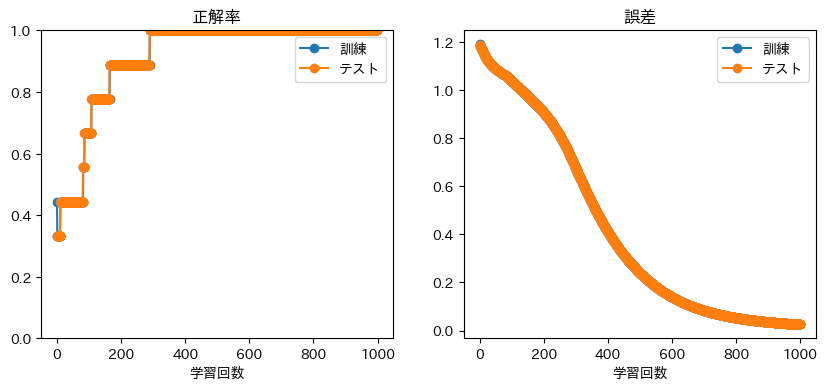

In [10]:
param = [["正解率", "accuracy", "val_accuracy"],
          ["誤差", "loss", "val_loss"]]
plt.figure(figsize=(10,4))
for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.title(param[i][0])
    plt.plot(history.history[param[i][1]], "o-")
    plt.plot(history.history[param[i][2]], "o-")
    plt.xlabel("学習回数")
    plt.legend(["訓練","テスト"], loc="best")
    if i==0:
        plt.ylim([0,1])
plt.show()

# 【データを渡して予測】

リスト4-13

In [11]:
pre = model.predict(x_test)
for i in range(3):
    print(f"{pre[i][0]:.0%} {pre[i][1]:.0%} {pre[i][2]:.0%}")

1/1 [==============================] - 0s 106ms/step
98% 2% 1%
1% 95% 4%
0% 4% 96%


リスト4-14

In [12]:
for i in range(len(x_test)):
    hand1 = hand_name[x_test[i][0]]
    hand2 = hand_name[x_test[i][1]]
    index = np.argmax(pre[i])
    judge = judge_name[index]
    print(f"私は「{hand1}」、相手は「{hand2}」なので、{judge}")

私は「グー」、相手は「グー」なので、あいこ
私は「グー」、相手は「チョキ」なので、勝ち
私は「グー」、相手は「パー」なので、負け
私は「チョキ」、相手は「グー」なので、負け
私は「チョキ」、相手は「チョキ」なので、あいこ
私は「チョキ」、相手は「パー」なので、勝ち
私は「パー」、相手は「グー」なので、勝ち
私は「パー」、相手は「チョキ」なので、負け
私は「パー」、相手は「パー」なので、あいこ
